In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,ecg,spo2,Sleep Disorder
0,1,27,6.1,6,42,6,2,77,4200,72,95,Normal
1,1,28,6.2,6,60,8,0,75,10000,63,95,Normal
2,1,28,6.2,6,60,8,0,75,10000,70,95,Normal
3,1,28,5.9,4,30,8,1,85,3000,98,93,Sleep Apnea
4,1,28,5.9,4,30,8,1,85,3000,69,85,Sleep Apnea


In [4]:
df.tail()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,ecg,spo2,Sleep Disorder
369,0,59,8.1,9,75,3,2,68,7000,86,86,Sleep Apnea
370,0,59,8.0,9,75,3,2,68,7000,94,89,Sleep Apnea
371,0,59,8.1,9,75,3,2,68,7000,77,91,Sleep Apnea
372,0,59,8.1,9,75,3,2,68,7000,83,89,Sleep Apnea
373,0,59,8.1,9,75,3,2,68,7000,98,92,Sleep Apnea


In [5]:
df.size

4488

In [6]:
df.shape

(374, 12)

In [7]:
df.columns

Index(['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'ecg', 'spo2', 'Sleep Disorder'],
      dtype='object')

In [9]:
df['Sleep Disorder'].unique()

array(['Normal', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [10]:
df.dtypes

Gender                       int64
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                 int64
Heart Rate                   int64
Daily Steps                  int64
ecg                          int64
spo2                         int64
Sleep Disorder              object
dtype: object

In [11]:
df['Sleep Disorder'].value_counts()

Normal         219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

<AxesSubplot:>

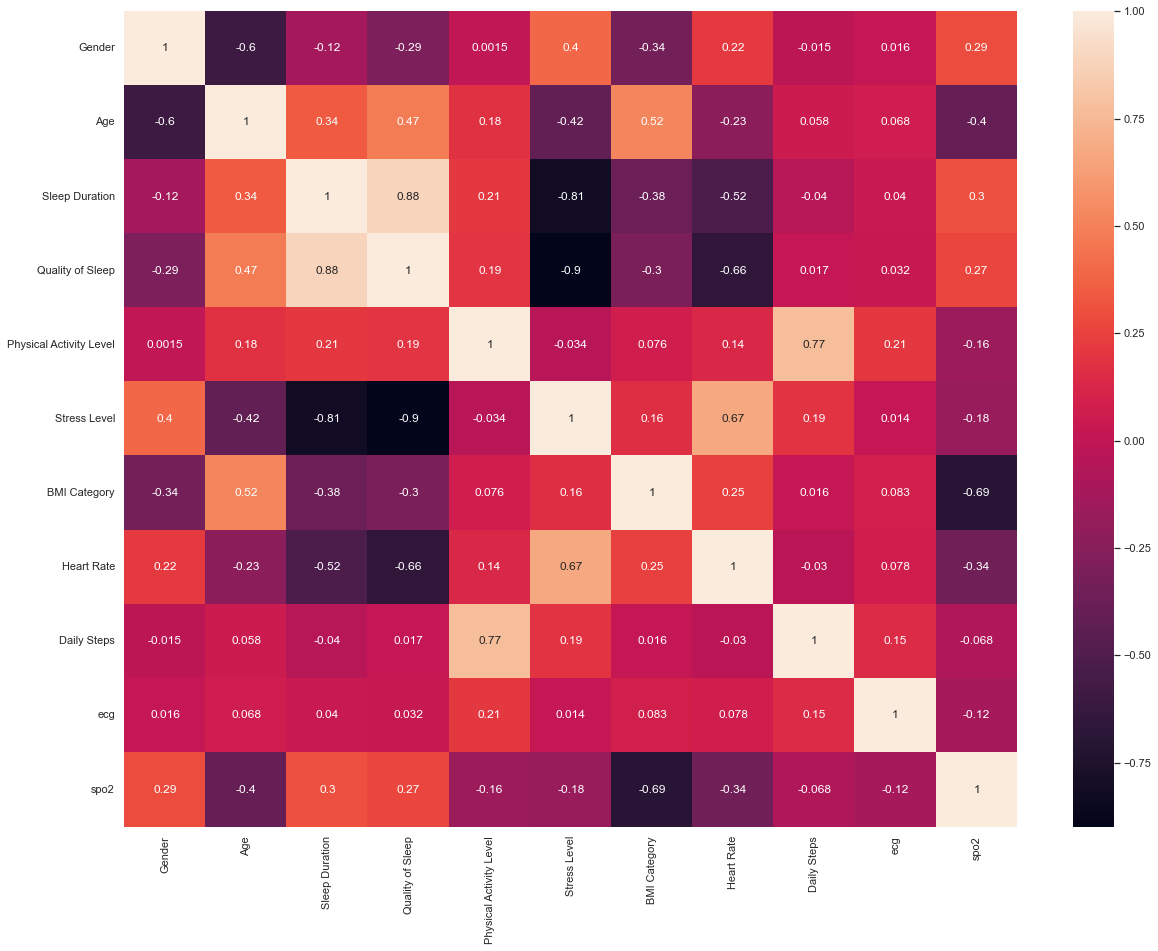

In [12]:
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [40]:
features = df[['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'ecg', 'spo2']]
target = df['Sleep Disorder']


374

In [14]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [15]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [42]:
Xtest.shape

(75, 11)

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  96.0
              precision    recall  f1-score   support

    Insomnia       0.93      0.87      0.90        15
      Normal       1.00      1.00      1.00        42
 Sleep Apnea       0.89      0.94      0.92        18

    accuracy                           0.96        75
   macro avg       0.94      0.94      0.94        75
weighted avg       0.96      0.96      0.96        75



In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [19]:
score

array([0.84      , 0.98666667, 0.97333333, 1.        , 0.86486486])

### Saving trained Decision Tree model

In [20]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9466666666666667
              precision    recall  f1-score   support

    Insomnia       0.88      0.93      0.90        15
      Normal       0.95      0.98      0.96        42
 Sleep Apnea       1.00      0.89      0.94        18

    accuracy                           0.95        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.95      0.95      0.95        75



In [22]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.69333333, 0.84      , 0.98666667, 0.98666667, 0.77027027])

### Saving trained Guassian Naive Bayes model

In [23]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.96
              precision    recall  f1-score   support

    Insomnia       0.93      0.93      0.93        15
      Normal       0.95      1.00      0.98        42
 Sleep Apnea       1.00      0.89      0.94        18

    accuracy                           0.96        75
   macro avg       0.96      0.94      0.95        75
weighted avg       0.96      0.96      0.96        75



In [25]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.56      , 0.58666667, 0.58666667, 0.6       , 0.52702703])

In [26]:
#Saving trained SVM model

In [27]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9866666666666667
              precision    recall  f1-score   support

    Insomnia       1.00      0.93      0.97        15
      Normal       1.00      1.00      1.00        42
 Sleep Apnea       0.95      1.00      0.97        18

    accuracy                           0.99        75
   macro avg       0.98      0.98      0.98        75
weighted avg       0.99      0.99      0.99        75



In [29]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.72      , 0.98666667, 1.        , 1.        , 0.87837838])

### Saving trained Random Forest model

In [30]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

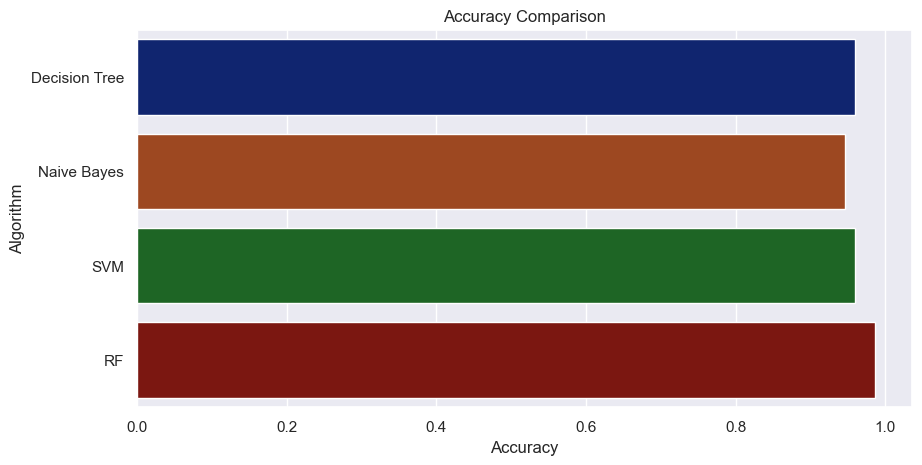

In [31]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [32]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.96
Naive Bayes --> 0.9466666666666667
SVM --> 0.96
RF --> 0.9866666666666667


## Making a prediction

In [36]:
data = np.array([[1,28,5.9,4,30,8,1,85,3000,98,93]])
prediction = RF.predict(data)
print(prediction[0])

Sleep Apnea


In [38]:
data = np.array([[1,28,5.9,4,30,8,1,85,3000,57,92]])
prediction = RF.predict(data)
print(prediction[0])

Insomnia


In [39]:
data = np.array([[1,30,7.6,7,75,6,0,70,8000,63,98]])
prediction = RF.predict(data)
print(prediction[0])

Normal
